## Model 1: Policy simulation

The objective of this model-based simulation is to analyse the impact of policy, technology, and commodity changes on consumer price inflation in selected countries. The simulation environment is learnt from real data, after which simulations using synthetic data are used to do policy analysis by manipulating a number of selected variables such as government debt, cellular subscription, gdp growth, and real interest rates in the synthetic data. A secondary purpose of the simulation model is to identify and map the interactions between world-level and country-level indicator variables.

#### Features
------------

Multivariate human and technological development indicator timeseries
1. aggregated across nations using hand-crafted rules.
2. raw, collected on a per-country level.

#### Labels
----------

Consumer price inflation levels for the following countries:

* Singapore
* Switzerland
* Netherlands
* Japan
* France
* United States
* China
* India
* Brazil
* Colombia
* Indonesia
* Senegal
* Ghana

#### Training
------------

Training is done on a feature - single country basis.

### Load and prepare the data

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from tensorflow import keras

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:20,.4f}'.format

In [3]:
sns.set_style("whitegrid")
sns.set_palette("colorblind")

In [88]:
country = 'Japan'

In [89]:
country_labels = ['Brazil', 'China', 'Colombia', 'France', 'Ghana', 'India', 'Indonesia', 'Japan', 'Netherlands',
                  'Senegal', 'Singapore', 'Switzerland', 'United States']

In [90]:
assert country in country_labels

#### Load and combine the features and labels

In [7]:
features_df = pd.read_csv('features/m_one/world_aggregate.csv', sep=';', header=0)
labels_df = pd.read_csv('features/m_one/labels_interpolated.csv', sep=';', header=0)

In [8]:
features_df.head()

,date,bank capital to assets ratio,bank nonperforming loans,cereal yield,energy imports,food exports,high-tech exports,inflation,lending interest rate,life expectancy,...,electricity access,co2 emissions,electricity consumption,mobile subscriptions,newborns,overweight,rural population,unemployed,urban population,workers
0,1960-01-01,0.0000,0.0000,0.0000,0.0517,0.0000,0.0000,0.0000,0.0019,45.2673,...,0.0000,2.1968,0.4982,0.0000,0.0318,0.0000,0.6634,0.0014,0.3362,0.0232
1,1960-02-01,0.0000,0.0000,0.0000,0.0517,0.0000,0.0000,0.0000,0.0019,45.3268,...,0.0000,2.1920,0.5003,0.0000,0.0317,0.0000,0.6630,0.0014,0.3367,0.0232
2,1960-03-01,0.0000,0.0000,0.0000,0.0518,0.0000,0.0000,0.0000,0.0019,45.3863,...,0.0000,2.1872,0.5024,0.0000,0.0316,0.0000,0.6626,0.0014,0.3371,0.0232
3,1960-04-01,0.0000,0.0000,0.0000,0.0519,0.0000,0.0000,0.0000,0.0019,45.4458,...,0.0000,2.1825,0.5045,0.0000,0.0316,0.0000,0.6622,0.0015,0.3375,0.0232
4,1960-05-01,0.0000,0.0000,0.0000,0.0520,0.0000,0.0000,0.0000,0.0019,45.5052,...,0.0000,2.1777,0.5066,0.0000,0.0315,0.0000,0.6617,0.0015,0.3379,0.0232


In [9]:
labels_df.head()

,date,Brazil,China,Colombia,France,Ghana,India,Indonesia,Japan,Netherlands,Senegal,Singapore,Switzerland,United States
0,1960-01-01,0.0000,0.0000,0.0581,0.0414,0.0000,0.0178,0.3959,0.0357,0.0232,0.0000,0.0000,0.0144,0.0146
1,1960-02-01,0.0000,0.0000,0.0602,0.0399,0.0000,0.0178,0.3743,0.0372,0.0224,0.0000,0.0003,0.0147,0.0143
2,1960-03-01,0.0000,0.0000,0.0623,0.0385,0.0000,0.0178,0.3527,0.0387,0.0215,0.0000,0.0007,0.0151,0.0139
3,1960-04-01,0.0000,0.0000,0.0643,0.0371,0.0000,0.0178,0.3312,0.0402,0.0207,0.0000,0.0010,0.0154,0.0136
4,1960-05-01,0.0000,0.0000,0.0664,0.0356,0.0000,0.0177,0.3096,0.0417,0.0199,0.0000,0.0013,0.0157,0.0133


In [10]:
combined_df = pd.concat([features_df, labels_df.drop(columns=['date'])], axis=1)

In [11]:
combined_df.head()

,date,bank capital to assets ratio,bank nonperforming loans,cereal yield,energy imports,food exports,high-tech exports,inflation,lending interest rate,life expectancy,...,France,Ghana,India,Indonesia,Japan,Netherlands,Senegal,Singapore,Switzerland,United States
0,1960-01-01,0.0000,0.0000,0.0000,0.0517,0.0000,0.0000,0.0000,0.0019,45.2673,...,0.0414,0.0000,0.0178,0.3959,0.0357,0.0232,0.0000,0.0000,0.0144,0.0146
1,1960-02-01,0.0000,0.0000,0.0000,0.0517,0.0000,0.0000,0.0000,0.0019,45.3268,...,0.0399,0.0000,0.0178,0.3743,0.0372,0.0224,0.0000,0.0003,0.0147,0.0143
2,1960-03-01,0.0000,0.0000,0.0000,0.0518,0.0000,0.0000,0.0000,0.0019,45.3863,...,0.0385,0.0000,0.0178,0.3527,0.0387,0.0215,0.0000,0.0007,0.0151,0.0139
3,1960-04-01,0.0000,0.0000,0.0000,0.0519,0.0000,0.0000,0.0000,0.0019,45.4458,...,0.0371,0.0000,0.0178,0.3312,0.0402,0.0207,0.0000,0.0010,0.0154,0.0136
4,1960-05-01,0.0000,0.0000,0.0000,0.0520,0.0000,0.0000,0.0000,0.0019,45.5052,...,0.0356,0.0000,0.0177,0.3096,0.0417,0.0199,0.0000,0.0013,0.0157,0.0133


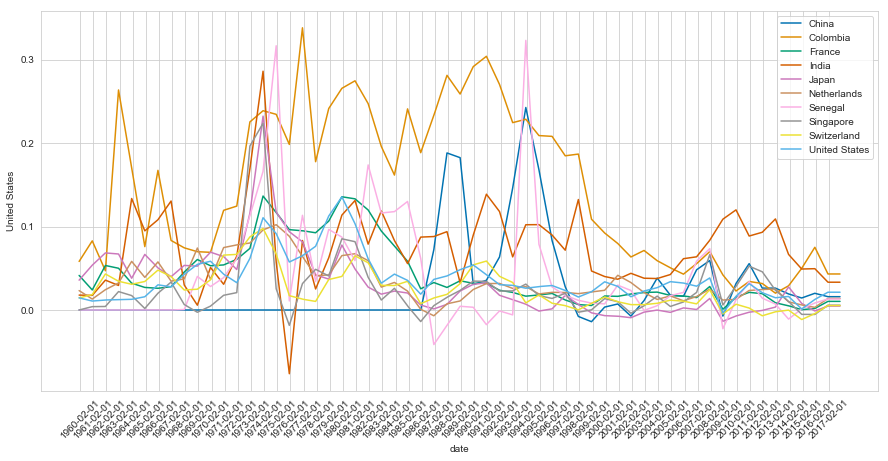

In [12]:
fig, ax = plt.subplots(figsize=(15,7))
[sns.lineplot(x='date', y=c, markers=True, ax=ax, label=c, data=combined_df) for c in list(filter(lambda x: x not in ['Brazil', 'Indonesia', 'Ghana'], country_labels))]

xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i % 12 == 1:
        xticks[i].set_visible(True)
    else:
        xticks[i].set_visible(False)

ax.set_xticklabels(combined_df['date'], rotation=45);

In [13]:
combined_df.columns

Index(['date', 'bank capital to assets ratio', 'bank nonperforming loans',
       'cereal yield', 'energy imports', 'food exports', 'high-tech exports',
       'inflation', 'lending interest rate', 'life expectancy',
       'population density', 'real interest rate', 'broad money',
       'exports of goods and services', 'gross domestic savings',
       'high-tech value added', 'household consumption expenditure',
       'imports of goods and services', 'listed companies',
       'manufacturing value added', 'r and d spend', 'services trade', 'trade',
       'government debt service', 'government interest payments external debt',
       'government tax revenue', 'birth deaths', 'broadband subscriptions',
       'electricity access', 'co2 emissions', 'electricity consumption',
       'mobile subscriptions', 'newborns', 'overweight', 'rural population',
       'unemployed', 'urban population', 'workers', 'Brazil', 'China',
       'Colombia', 'France', 'Ghana', 'India', 'Indonesia', 'Japa

### Prepare the country features

In [425]:
base_feature_df = combined_df[['bank capital to assets ratio', 'bank nonperforming loans', 'cereal yield',
                               'energy imports', 'food exports', 'high-tech exports', 'inflation',
                               'lending interest rate', 'life expectancy', 'population density', 'real interest rate',
                               'broad money', 'exports of goods and services', 'gross domestic savings',
                               'high-tech value added', 'household consumption expenditure',
                               'imports of goods and services', 'listed companies', 'manufacturing value added',
                               'r and d spend', 'services trade', 'trade', 'government debt service',
                               'government interest payments external debt', 'government tax revenue', 'birth deaths',
                               'broadband subscriptions', 'electricity access', 'co2 emissions',
                               'electricity consumption', 'mobile subscriptions', 'newborns', 'overweight',
                               'rural population', 'unemployed', 'urban population', 'workers', country]]

In [426]:
base_feature_df.to_csv('features/m_one/combined_%s.csv' % country.lower(), sep=',', index=False)

In [607]:
base_feature_df['label'] = base_feature_df[country].shift(periods=1)
base_df = base_feature_df.drop(country, axis=1).fillna(0.00);

In [428]:
num_obs = len(base_df)
num_cols = len(base_df.columns)
num_features = len(base_df.columns) - 1

### Model iterations
---------------------

In [808]:
from keras import Sequential
from keras.layers import LSTM, Dense, LeakyReLU, Conv1D, Flatten, GaussianNoise, MaxPool1D, ELU
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

### Exploration 1

**Multivariate LSTM** fitted on the real data, see https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/
- Num observations source dataset: 684 (using lagshift, 1960-2016 inclusive monthly)
- Num sequences (@ sequence length 6): 116.
- Batch size: 4-8 sequences (although `size=48` would lead to more stable training)

In [364]:
lstm_params = {
   'sequence_length': 6,
   'batch_size': 6,
   'num_epochs': 100,
   'num_units': 128
}

#### LSTM features

In [366]:
features = []
labels = []

for i in range(int(num_obs / lstm_params['sequence_length'])):
    labels_df = base_df['label']
    labels.append(labels_df[i:(i+lstm_params['sequence_length'])].values[-1:])
    features.append(base_df[i:(i+lstm_params['sequence_length'])].values)

In [367]:
lstm_train_X = np.asarray(features[0:100])
lstm_train_X = lstm_train_X.reshape((lstm_train_X.shape[0], lstm_params['sequence_length'], num_cols))
lstm_train_y = np.asarray(labels[0:100])
lstm_train_y = lstm_train_y.reshape((lstm_train_y.shape[0]))

In [368]:
lstm_test_X = np.asarray(features[100:])
lstm_test_X = lstm_test_X.reshape((lstm_test_X.shape[0], lstm_params['sequence_length'], num_cols))
lstm_test_y = np.asarray(labels[100:])
lstm_test_y = lstm_test_y.reshape((lstm_test_y.shape[0]))

In [369]:
X = np.asarray(features)
X = X.reshape((X.shape[0], lstm_params['sequence_length'], num_cols))
y = np.asarray(labels)
y = y.reshape((y.shape[0], 1))

In [370]:
print('X: %s, y: %s' % (X.shape, y.shape))

X: (116, 6, 38), y: (116, 1)


#### Model: LSTM

In [372]:
model = Sequential()
model.add(LSTM(lstm_params['num_units'], input_shape=(lstm_params['sequence_length'], num_cols)))
model.add(Dense(1, activation=LeakyReLU(alpha=0.3)))
model.compile(loss='mse', optimizer='adam')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_27 (LSTM)               (None, 128)               85504     
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 129       
Total params: 85,633
Trainable params: 85,633
Non-trainable params: 0
_________________________________________________________________


In [373]:
train_run = model.fit(lstm_train_X, lstm_train_y, epochs=lstm_params['num_epochs'], batch_size=lstm_params['batch_size'])

Epoch 1/1000
100/100 [==============================] - 3s 26ms/step - loss: 0.0057
Epoch 2/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 3/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.5286e-04
Epoch 4/1000
100/100 [==============================] - 0s 2ms/step - loss: 9.0312e-05
Epoch 5/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.0385e-04
Epoch 6/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.1561e-04
Epoch 7/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.2275e-04
Epoch 8/1000
100/100 [==============================] - 0s 2ms/step - loss: 9.5405e-05
Epoch 9/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.2724e-04
Epoch 10/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.4645e-04
Epoch 11/1000
100/100 [==============================] - 0s 2ms/step - loss: 6.4236e-05
Epoch 12/1000
100/100 [=========================

100/100 [==============================] - 0s 2ms/step - loss: 1.8773e-04
Epoch 95/1000
100/100 [==============================] - 0s 2ms/step - loss: 9.4453e-05
Epoch 96/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.0434e-04
Epoch 97/1000
100/100 [==============================] - 0s 2ms/step - loss: 7.6034e-05
Epoch 98/1000
100/100 [==============================] - 0s 2ms/step - loss: 5.5157e-05
Epoch 99/1000
100/100 [==============================] - 0s 2ms/step - loss: 6.0668e-05
Epoch 100/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.1162e-04
Epoch 101/1000
100/100 [==============================] - 0s 2ms/step - loss: 8.8528e-05
Epoch 102/1000
100/100 [==============================] - 0s 2ms/step - loss: 7.0749e-05
Epoch 103/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.6874e-05
Epoch 104/1000
100/100 [==============================] - 0s 2ms/step - loss: 8.5303e-05
Epoch 105/1000
100/100 [=================

100/100 [==============================] - 0s 2ms/step - loss: 9.3138e-05
Epoch 187/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.0046e-04
Epoch 188/1000
100/100 [==============================] - 0s 2ms/step - loss: 9.1021e-05
Epoch 189/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.9511e-05
Epoch 190/1000
100/100 [==============================] - 0s 2ms/step - loss: 7.2851e-05
Epoch 191/1000
100/100 [==============================] - 0s 2ms/step - loss: 6.0751e-05
Epoch 192/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.8807e-05
Epoch 193/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.2275e-05
Epoch 194/1000
100/100 [==============================] - 0s 2ms/step - loss: 5.3150e-05
Epoch 195/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.2557e-05
Epoch 196/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.2482e-05
Epoch 197/1000
100/100 [============

100/100 [==============================] - 0s 2ms/step - loss: 6.2717e-05
Epoch 279/1000
100/100 [==============================] - 0s 2ms/step - loss: 7.1313e-05
Epoch 280/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.6543e-05
Epoch 281/1000
100/100 [==============================] - 0s 2ms/step - loss: 8.4670e-05
Epoch 282/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.1524e-05
Epoch 283/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.2963e-05
Epoch 284/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.2101e-05
Epoch 285/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.5256e-05
Epoch 286/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.6510e-05
Epoch 287/1000
100/100 [==============================] - 0s 2ms/step - loss: 7.0698e-05
Epoch 288/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.6668e-05
Epoch 289/1000
100/100 [============

100/100 [==============================] - 0s 2ms/step - loss: 4.7406e-05
Epoch 371/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.0161e-05
Epoch 372/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.4260e-05
Epoch 373/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.8142e-05
Epoch 374/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.7668e-05
Epoch 375/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.9361e-05
Epoch 376/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.5553e-05
Epoch 377/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.1553e-05
Epoch 378/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.3648e-05
Epoch 379/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.8062e-05
Epoch 380/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.7267e-05
Epoch 381/1000
100/100 [============

100/100 [==============================] - 0s 2ms/step - loss: 2.1344e-05
Epoch 463/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.6242e-05
Epoch 464/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.5565e-05
Epoch 465/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.4695e-05
Epoch 466/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.0998e-05
Epoch 467/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.4255e-05
Epoch 468/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.6343e-05
Epoch 469/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.9273e-05
Epoch 470/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.0648e-05
Epoch 471/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.8345e-05
Epoch 472/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.2569e-05
Epoch 473/1000
100/100 [============

100/100 [==============================] - 0s 2ms/step - loss: 2.3810e-05
Epoch 555/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.5912e-05
Epoch 556/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.4691e-05
Epoch 557/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.0188e-05
Epoch 558/1000
100/100 [==============================] - 0s 2ms/step - loss: 5.0767e-05
Epoch 559/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.4497e-05
Epoch 560/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.2147e-05
Epoch 561/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.8847e-05
Epoch 562/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.8794e-05
Epoch 563/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.1934e-05
Epoch 564/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.3878e-05
Epoch 565/1000
100/100 [============

100/100 [==============================] - 0s 2ms/step - loss: 3.7205e-05
Epoch 647/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.1705e-05
Epoch 648/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.7463e-05
Epoch 649/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.3099e-05
Epoch 650/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.9077e-05
Epoch 651/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.9716e-05
Epoch 652/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.6441e-05
Epoch 653/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.8309e-05
Epoch 654/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.5129e-05
Epoch 655/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.5185e-05
Epoch 656/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.9235e-05
Epoch 657/1000
100/100 [============

100/100 [==============================] - 0s 2ms/step - loss: 1.6849e-05
Epoch 739/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.4652e-05
Epoch 740/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.1222e-05
Epoch 741/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.0726e-05
Epoch 742/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.0408e-05
Epoch 743/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.6518e-05
Epoch 744/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.5258e-05
Epoch 745/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.0874e-05
Epoch 746/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.6874e-05
Epoch 747/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.0786e-05
Epoch 748/1000
100/100 [==============================] - 0s 2ms/step - loss: 9.2630e-06
Epoch 749/1000
100/100 [============

100/100 [==============================] - 0s 2ms/step - loss: 1.9480e-05
Epoch 831/1000
100/100 [==============================] - 0s 2ms/step - loss: 7.4792e-06
Epoch 832/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.4342e-05
Epoch 833/1000
100/100 [==============================] - 0s 2ms/step - loss: 2.1421e-05
Epoch 834/1000
100/100 [==============================] - 0s 2ms/step - loss: 8.8729e-06
Epoch 835/1000
100/100 [==============================] - 0s 2ms/step - loss: 9.2570e-06
Epoch 836/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.3515e-05
Epoch 837/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.6212e-05
Epoch 838/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.6901e-05
Epoch 839/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.6507e-05
Epoch 840/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.3308e-05
Epoch 841/1000
100/100 [============

100/100 [==============================] - 0s 2ms/step - loss: 9.5701e-06
Epoch 923/1000
100/100 [==============================] - 0s 2ms/step - loss: 5.6332e-06
Epoch 924/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.8852e-06
Epoch 925/1000
100/100 [==============================] - 0s 2ms/step - loss: 9.9611e-06
Epoch 926/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.5172e-06
Epoch 927/1000
100/100 [==============================] - 0s 2ms/step - loss: 3.4794e-06
Epoch 928/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.0281e-05
Epoch 929/1000
100/100 [==============================] - 0s 2ms/step - loss: 4.4762e-06
Epoch 930/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.8233e-05
Epoch 931/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.1482e-05
Epoch 932/1000
100/100 [==============================] - 0s 2ms/step - loss: 1.1234e-05
Epoch 933/1000
100/100 [============

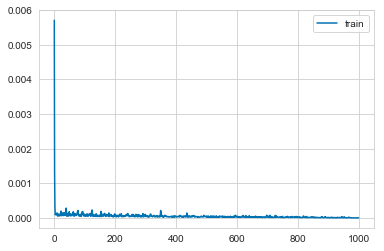

In [374]:
plt.plot(train_run.history['loss'], label='train')
plt.legend()
plt.show()

##### Evaluate model performance

In [375]:
model.evaluate(lstm_test_X, lstm_test_y)

16/16 [==============================] - 1s 53ms/step


9.00832765182713e-06

In [376]:
yhat = model.predict(lstm_test_X)

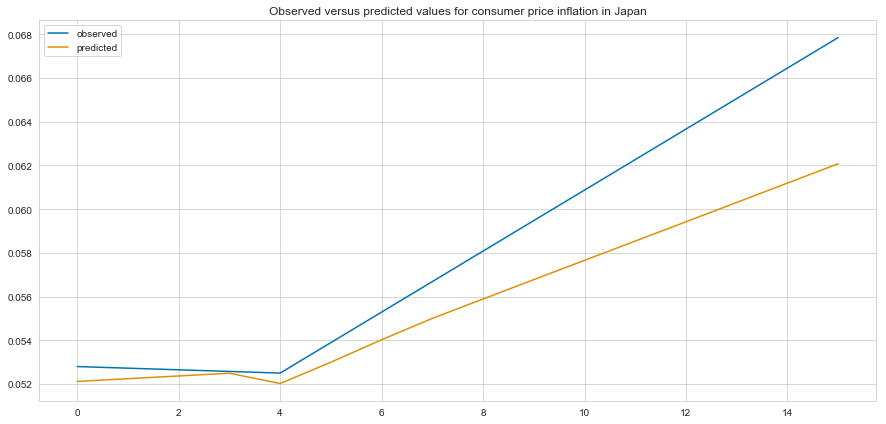

In [379]:
plt.figure(figsize=(15,7))
plt.plot(lstm_test_y, label='observed')
plt.plot(yhat, label='predicted')
plt.legend()
plt.title('Observed versus predicted values for consumer price inflation in %s' % country)
plt.show()

In [380]:
print('rmse: %s\nmean observed: %s\nmean predicted: %s' % (np.sqrt(mean_squared_error(lstm_test_y, yhat)),
                                                           np.mean(lstm_test_y), np.mean(yhat)))

rmse: 0.0030013875676725837
mean observed: 0.05830047022671336
mean predicted: 0.05594393


### Exploration 2

**GAN** to generate training data, **LSTM** trained on generated data validated on the real data. See https://arxiv.org/pdf/1706.02633.pdf.

Keras GAN implementation inspired by https://medium.com/@mattiaspinelli/simple-generative-adversarial-network-gans-with-keras-1fe578e44a87

In [608]:
gan_df = base_df
gan_df.shape

(696, 38)

In [609]:
gan_cols = gan_df.shape[1]

In [796]:
gan_params = {
   'num_epochs': 1000,
   'save_interval': 10,
   'batch_size': 32,
   'gen_noise_sigma': 0.7,
   'lr_gen': 0.001,
   'lr_disc': 0.01,
   'lr_gan': 0.001 
}

#### GAN

In [813]:
def generator():
    generator = Sequential(name='generator')
    generator.add(Dense(gan_cols, activation='sigmoid'))
    generator.add(GaussianNoise(stddev=gan_params['gen_noise_sigma']))
    generator.add(Dense(gan_cols, activation=LeakyReLU(alpha=0.3)))
    return generator

In [814]:
def discriminator():
    discriminator = Sequential(name='discriminator')
    discriminator.add(Conv1D(2, 2, activation=ELU(alpha=0.86), input_shape=(gan_cols, 1)))
    discriminator.add(MaxPool1D(pool_size=2))
    discriminator.add(Flatten())
    discriminator.add(Dense(1, activation='sigmoid'))
    return discriminator

In [815]:
def build_gan(params):
    g = generator()
    g.compile(loss='binary_crossentropy', optimizer=Adam(lr=params['lr_gen']))
    d = discriminator()
    d.compile(loss='cosine_proximity', optimizer=Adam(lr=params['lr_disc']))
    gan = Sequential(name='gan')
    gan.add(g)
    gan.add(d)
    # gan.summary()
    gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=params['lr_gan']))
    return g, d, gan

In [816]:
generator, discriminator, gan = build_gan(gan_params)

In [817]:
def train_gan(real_df, batch_size, params):
    d_loss = []
    g_loss = []
    for i in range(params['num_epochs']):
        generator = gan.get_layer('generator')
        discriminator = gan.get_layer('discriminator')
        
        # Select random samples from the real data as part of the training batch
        random_index = np.random.randint(0, len(real_df) - batch_size / 2)
        batch_real = real_df[random_index:int(random_index + batch_size / 2)]
        batch_synth = pd.DataFrame(np.random.rand(int(batch_size / 2), real_df.shape[1]), columns=real_df.columns)
        
        combined_df = pd.concat([batch_real, batch_synth]).sample(frac=1).reset_index(drop=True)
        disc_labels = np.reshape(combined_df['label'].values, (batch_size, 1))
        combined = np.reshape(combined_df.values, (batch_size, gan_cols, 1))
        
        # Train the discriminator and generator
        g_loss.append(generator.train_on_batch(batch_synth.values, batch_real.values))
        d_loss.append(discriminator.train_on_batch(combined, disc_labels))
    return d_loss, g_loss

In [818]:
d_loss, g_loss = train_gan(gan_df, gan_params['batch_size'], gan_params)

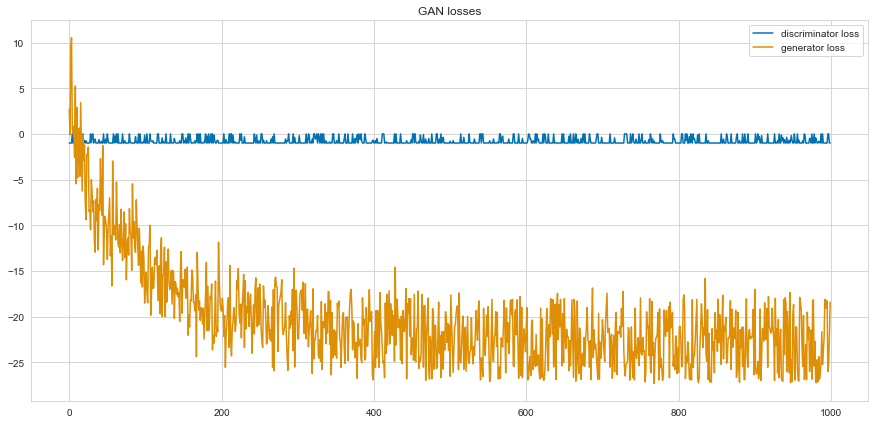

In [819]:
plt.figure(figsize=(15,7))
plt.plot(d_loss, label='discriminator loss')
plt.plot(g_loss, label='generator loss')
plt.legend()
plt.title('GAN losses')
plt.show()

In [820]:
generated_y = generator.predict(np.random.rand(num_obs, gan_cols))[:,-1]
gan_y = gan_df['label'].values

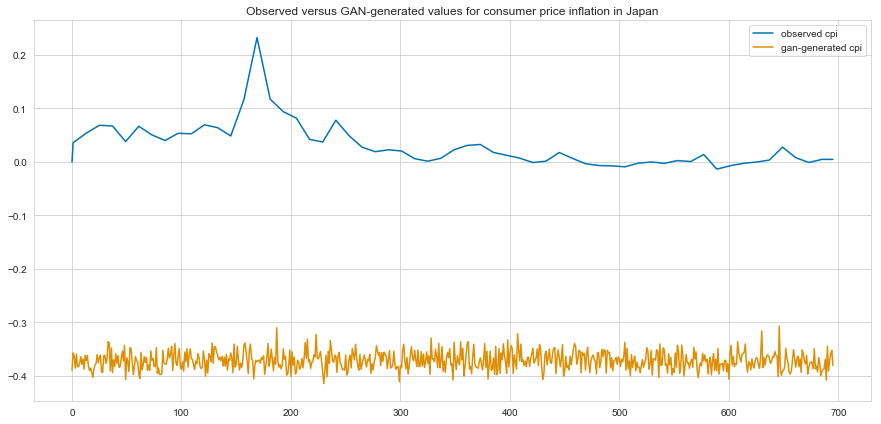

In [821]:
plt.figure(figsize=(15,7))
plt.plot(gan_y, label='observed cpi')
plt.plot(generated_y, label='gan-generated cpi')
plt.legend()
plt.title('Observed versus GAN-generated values for consumer price inflation in %s' % country)
plt.show()

In [822]:
print('rmse: %s\nmean observed: %s\nmean generated: %s' % (np.sqrt(mean_squared_error(gan_y, generated_y)),
                                                           np.mean(gan_y), np.mean(generated_y)))

rmse: 0.4043910818981559
mean observed: 0.03091935525584925
mean generated: -0.37113225


### Exploration 3

**Sequence transformer network** to generate training data, **LSTM** trained on generated data validated on the real data. See https://arxiv.org/abs/1808.06725

## Simulation 1

Question: what happens to consumer price inflation in the long run if the government decides to borrow more money?

##### Simulation parameters
- central government debt
- time horizon

##### Environment variables
- world economy: selected generated macroeconomic indicators
- country economy: selected generated country-level indicators
- hybrid: interaction country x world